In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
crime_data = pd.read_csv('Crime_Data_2010_2017.csv', header=0)

In [4]:
crime_data.head(10)

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,1208575,03/14/2013,03/11/2013,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)"
1,102005556,01/25/2010,01/22/2010,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)"
2,418,03/19/2013,03/18/2013,2030,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)"
3,101822289,11/11/2010,11/10/2010,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)"
4,42104479,01/11/2014,01/04/2014,2300,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,...,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)"
5,120125367,01/08/2013,01/08/2013,1400,1,Central,111,110,CRIMINAL HOMICIDE,1243 2000 1813 1814 2002 0416 0400,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AA,Adult Arrest,110.0,NaN,NaN,NaN,600 N HILL ST,NaN,"(34.0591, -118.2412)"
6,101105609,01/28/2010,01/27/2010,2230,11,Northeast,1125,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,YORK,AVENUE 51,"(34.1211, -118.2048)"
7,101620051,11/11/2010,11/07/2010,1600,16,Foothill,1641,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,EL DORADO,TRUESDALE,"(34.241, -118.3987)"
8,101910498,04/07/2010,04/07/2010,1600,19,Mission,1902,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,GLENOAKS,DRELL,"(34.3147, -118.4589)"
9,120908292,03/29/2013,01/15/2013,800,9,Van Nuys,904,668,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",0344 1300,...,NaN,IC,Invest Cont,668.0,NaN,NaN,NaN,7200 SEPULVEDA BL,NaN,"(34.2012, -118.4662)"


In [5]:
crime_data.columns

Index(['DR Number', 'Date Reported', 'Date Occurred', 'Time Occurred',
       'Area ID', 'Area Name', 'Reporting District', 'Crime Code',
       'Crime Code Description', 'MO Codes', 'Victim Age', 'Victim Sex',
       'Victim Descent', 'Premise Code', 'Premise Description',
       'Weapon Used Code', 'Weapon Description', 'Status Code',
       'Status Description', 'Crime Code 1', 'Crime Code 2', 'Crime Code 3',
       'Crime Code 4', 'Address', 'Cross Street', 'Location '],
      dtype='object')

In [6]:
crime_data['Area Name'].unique()

array(['77th Street', 'Olympic', 'Southeast', 'Topanga', 'Central',
       'Northeast', 'Foothill', 'Mission', 'Van Nuys', 'Newton',
       'N Hollywood', 'West Valley', 'Pacific', 'Devonshire', 'Rampart',
       'Southwest', 'Hollenbeck', 'Harbor', 'Hollywood', 'West LA',
       'Wilshire'], dtype=object)

In [7]:
whilshire = crime_data[crime_data['Area Name']=='Wilshire']

In [8]:
whilshire.head(3)

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
51015,130705381,02/03/2013,02/02/2013,2130,7,Wilshire,701,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,8100 MELROSE AV,NaN,"(34.0838, -118.3659)"
51379,130706073,02/21/2013,02/20/2013,1000,7,Wilshire,734,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,500 S CURSON AV,NaN,"(34.0657, -118.3552)"
51559,130706074,02/21/2013,02/20/2013,2200,7,Wilshire,779,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,1600 4TH AV,NaN,"(34.0436, -118.3213)"


In [9]:
len(whilshire['Time Occurred'].unique())

1079

In [10]:
whilshire_crm_cnt = whilshire['Crime Code Description'].dropna().value_counts()
crime_codes = np.array(whilshire_crm_cnt.index, dtype=str)
whilshire_crm_cnt = np.array(whilshire_crm_cnt, dtype=int)

Text(0.5,1,'Number of crimes in Whilshire area, LA')

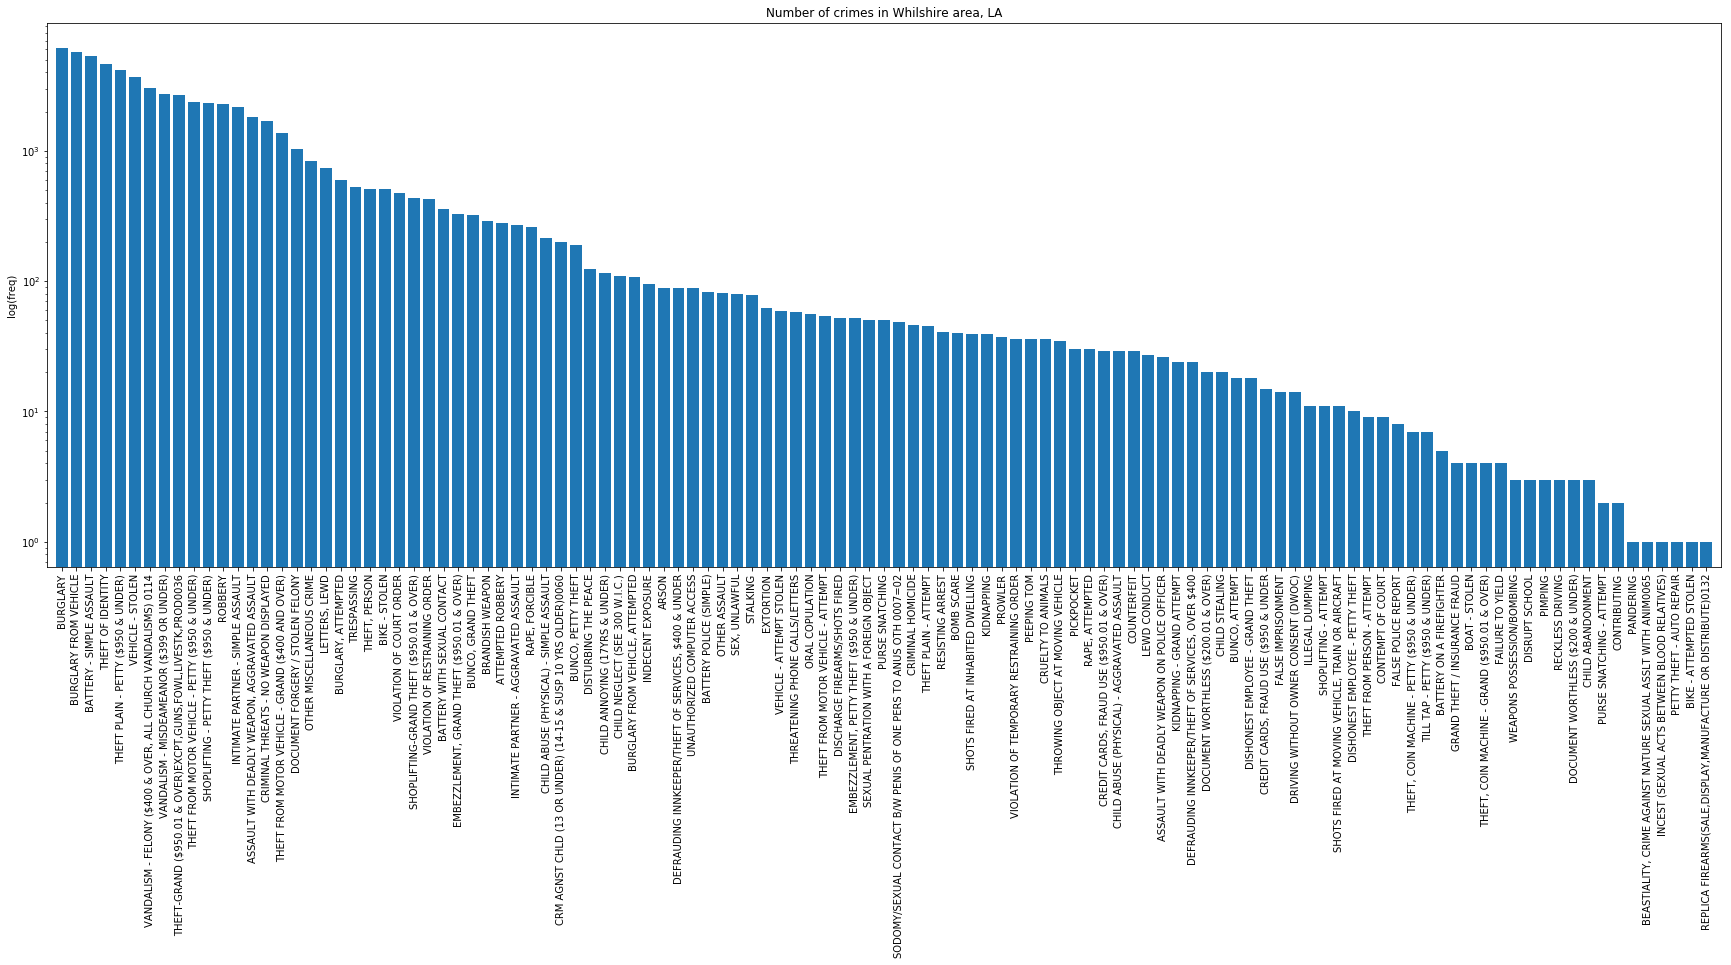

In [11]:
plt.figure(figsize=(30,10))
plt.bar(np.arange(0, len(whilshire_crm_cnt)), whilshire_crm_cnt)
plt.xticks(np.arange(0, len(whilshire_crm_cnt)), crime_codes, rotation=90)
plt.ylabel('log(freq)')
plt.yscale('log')
plt.xlim(-1, len(whilshire_crm_cnt))
plt.title('Number of crimes in Whilshire area, LA')

In [12]:
def whilshire_crime_num(crime):
    return whilshire_crm_cnt[crime_codes==crime]

In [13]:
whilshire_crime_num('VEHICLE - STOLEN')

array([3696])

In [14]:
crime_by_day = []
crime_by_night = []
crimes = []
for crime_code in crime_codes:
    crimes.append(crime_code)
    temp_whilshire = whilshire[whilshire['Crime Code Description']==crime_code]
    crime_by_day.append(temp_whilshire[(temp_whilshire['Time Occurred']>=600) & (temp_whilshire['Time Occurred']<=1930)].shape[0])
    crime_by_night.append(temp_whilshire[((temp_whilshire['Time Occurred']>=0) & (temp_whilshire['Time Occurred']<600)) |
                                         ((temp_whilshire['Time Occurred']>1930) & (temp_whilshire['Time Occurred']<=2359))].shape[0])
crimes = np.array(crimes, dtype=str)
crime_by_day = np.array(crime_by_day, dtype=int)
crime_by_night = np.array(crime_by_night, dtype=int)
print('Total number of crimes in Whilshire area, LA, between 2010 and 2017 -> {:d}'.format(np.sum(whilshire_crm_cnt)))
print('Total number of day crimes in Whilshire area, LA, between 2010 and 2017 -> {:d}'.format(np.sum(crime_by_day)))
print('Total number of night crimes in Whilshire area, LA, between 2010 and 2017 -> {:d}'.format(np.sum(crime_by_night)))
print('Percentage of day crimes -> {:.2f}%'.format(np.sum(crime_by_day)/np.sum(whilshire_crm_cnt)*100))
print('Percentage of night crimes -> {:.2f}%'.format(np.sum(crime_by_night)/np.sum(whilshire_crm_cnt)*100))

Total number of crimes in Whilshire area, LA, between 2010 and 2017 -> 63595
Total number of day crimes in Whilshire area, LA, between 2010 and 2017 -> 42774
Total number of night crimes in Whilshire area, LA, between 2010 and 2017 -> 20821
Percentage of day crimes -> 67.26%
Percentage of night crimes -> 32.74%


Text(0.5,1,'Number of day crimes in Whilshire area, LA')

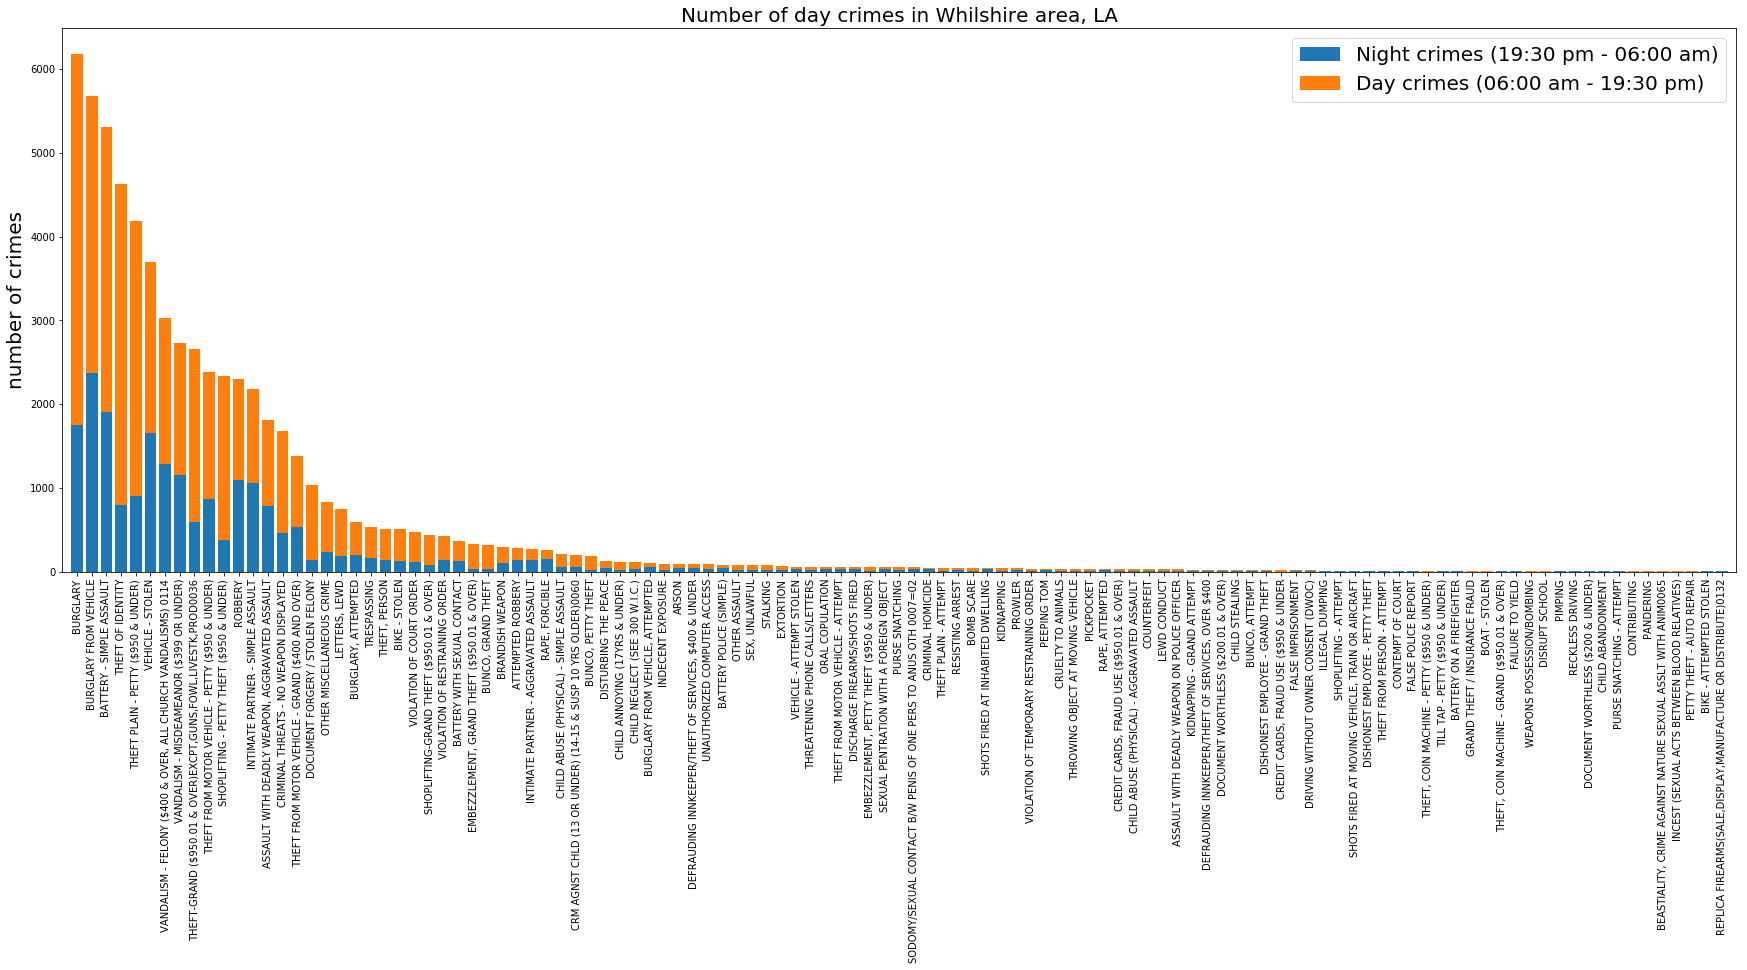

In [15]:
plt.figure(figsize=(30,10))
p1 = plt.bar(np.arange(0, len(crimes)), crime_by_night)
p2 = plt.bar(np.arange(0, len(crimes)), crime_by_day, bottom=crime_by_night)
plt.xticks(np.arange(0, len(crimes)), crimes, rotation=90)
plt.ylabel('number of crimes', fontsize=20)
plt.legend((p1[0], p2[0]), ('Night crimes (19:30 pm - 06:00 am)', 'Day crimes (06:00 am - 19:30 pm)'), fontsize=20)
#plt.yscale('log')
plt.xlim(-1, len(crimes))
plt.title('Number of day crimes in Whilshire area, LA', fontsize=20)
#plt.savefig('LA_crimes.pdf', dpi=400)

In [16]:
crime_area_cnt = crime_data['Area Name'].dropna().value_counts()
crime_areas = np.array(crime_area_cnt.index, dtype=str)
crime_area_cnt = np.array(crime_area_cnt, dtype=int)

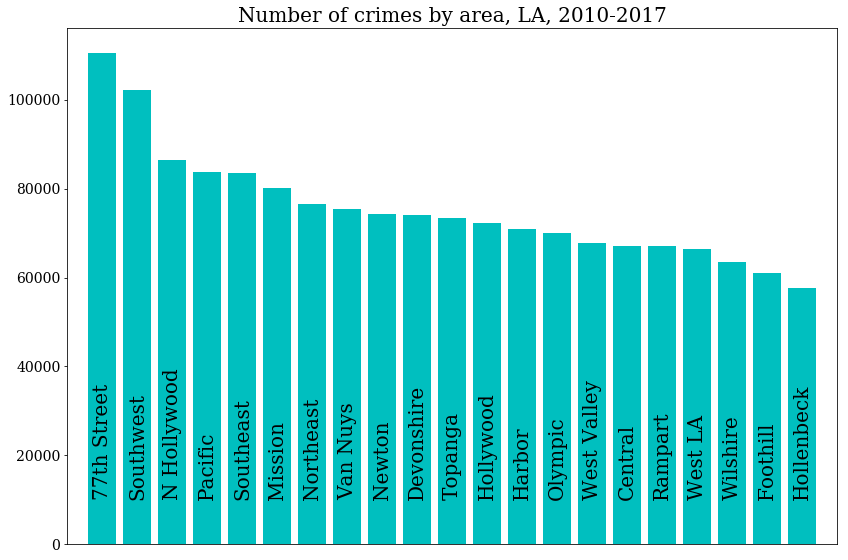

In [17]:
plt.rc('font',family = 'serif',size = 14)
fig, ax = plt.subplots(1,1,figsize=(12,8))
bars = ax.bar(np.arange(0, len(crime_area_cnt)), crime_area_cnt, color='c')
for i, bar in enumerate(bars):
    h = bar.get_height()
    ax.text(bar.get_x()+bar.get_width()/2., 10000, '%s' % crime_areas[i], ha='center', va='bottom', rotation=90, fontsize=20)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
#plt.xticks(np.arange(0, len(crime_area_cnt)), crime_areas, rotation=90)
#plt.ylabel('number of crimes', fontsize=20)
plt.xlim(-1, len(crime_area_cnt))
plt.title('Number of crimes by area, LA, 2010-2017', fontsize=20)
plt.tight_layout()

In [18]:
crime_area_day = []
crime_area_night = []
areas = []
for area in crime_areas:
    areas.append(area)
    temp = crime_data[crime_data['Area Name']==area]
    crime_area_day.append(temp[(temp['Time Occurred']>=600) & (temp['Time Occurred']<=1930)].shape[0])
    crime_area_night.append(temp[((temp['Time Occurred']>=0) & (temp['Time Occurred']<600)) |
                               ((temp['Time Occurred']>1930) & (temp['Time Occurred']<=2359))].shape[0])
areas = np.array(areas, dtype=str)
crime_area_day = np.array(crime_area_day, dtype=int)
crime_area_night = np.array(crime_area_night, dtype=int)
print('Total number of crimes in LA between 2010 and 2017 -> {:d}'.format(np.sum(crime_area_cnt)))
print('Total number of day crimes in LA between 2010 and 2017 -> {:d}'.format(np.sum(crime_area_day)))
print('Total number of night crimes in LA between 2010 and 2017 -> {:d}'.format(np.sum(crime_area_night)))
print('Percentage of day crimes -> {:.2f}%'.format(np.sum(crime_area_day)/np.sum(crime_area_cnt)*100))
print('Percentage of night crimes -> {:.2f}%'.format(np.sum(crime_area_night)/np.sum(crime_area_cnt)*100))

Total number of crimes in LA between 2010 and 2017 -> 1584316
Total number of day crimes in LA between 2010 and 2017 -> 1018185
Total number of night crimes in LA between 2010 and 2017 -> 566131
Percentage of day crimes -> 64.27%
Percentage of night crimes -> 35.73%


Text(0.5,1,'Number of crimes in LA (2010-2017)')

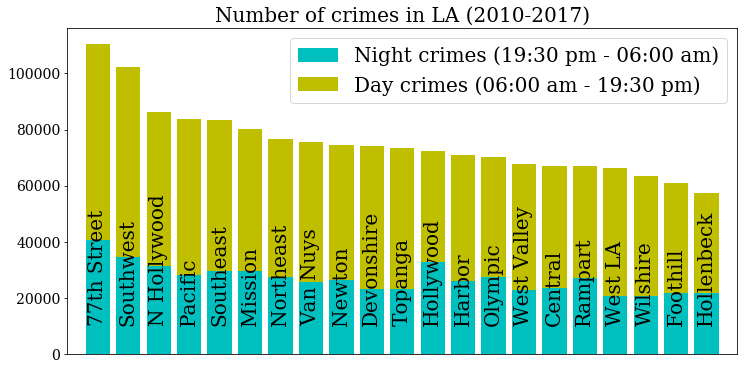

In [23]:
plt.rc('font',family = 'serif',size = 14)
fig, ax = plt.subplots(1,1,figsize=(12,6))
p1 = ax.bar(np.arange(0, len(areas)), crime_area_night, color='c')
p2 = ax.bar(np.arange(0, len(areas)), crime_area_day, bottom=crime_area_night, color='y')
for i, bar in enumerate(p1):
    h = bar.get_height()
    ax.text(bar.get_x()+bar.get_width()/2., 10000, '%s' % areas[i], ha='center', va='bottom', rotation=90, fontsize=20)
#plt.xticks(np.arange(0, len(areas)), areas, rotation=90)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.legend((p1[0], p2[0]), ('Night crimes (19:30 pm - 06:00 am)', 'Day crimes (06:00 am - 19:30 pm)'), fontsize=20)
plt.xlim(-1, len(areas))
plt.title('Number of crimes in LA (2010-2017)', fontsize=20)
#plt.savefig('LA_crimes.pdf', dpi=400)

In [ ]:
#maggiore crimine per zona
#mappe con tutti i 5 crimini maggiori in ogni zona